<a href="https://colab.research.google.com/github/liyan56/Group11_CHL5230_Datathon-6/blob/main/Models_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
#Upload the data file

from google.colab import files
import io
dataset = files.upload()

Saving Diabetes Study File 10K Dec 14 2017.xlsx to Diabetes Study File 10K Dec 14 2017.xlsx


In [ ]:
#Load modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Modules for KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

#Addition modules for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

#Addtiion modules for Naïve Bayes Classifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV

#Addtiion modules for Decision Tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

#Additional modulues for Neural Networks
# !pip install torch

# importing torch as t
import torch as t
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout


In [ ]:
#Obtain the detail of the dataset

diabete_data = pd.read_excel(io.BytesIO(dataset['Diabetes Study File 10K Dec 14 2017.xlsx']))
##Getting the shape of the dataframe
print(diabete_data.shape)
##List the columns of the dataframe
print(diabete_data.columns)
##Check for missing values in the dataset
print(diabete_data.isna().sum())
##Display the data types of each column
diabete_data.dtypes
##Display overall summary statistics
print(diabete_data.describe())
print(diabete_data['DIABETES'].value_counts())
print(diabete_data['Sex'].value_counts())


(10000, 43)
Index(['Age_at_Exam', 'sBP', 'sBP_Date', 'BMI', 'BMI_Date', 'LDL', 'LDL_Date',
       'HDL', 'HDL_Date', 'A1c', 'A1c_Date', 'TG', 'TG_Date', 'FBS',
       'FBS_Date', 'FBS>DM', 'Total_Cholesterol', 'Total_Cholesterol_Lab_Date',
       'Diabetes', 'DM_OnsetDate', 'Depression', 'Depression_OnsetDate', 'HTN',
       'HTN_OnsetDate', 'OA', 'OA_OnsetDate', 'COPD', 'COPD_Date',
       'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
       'Corticosteroids', 'Corticosteroids_first_instance', 'Sex',
       'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
       'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM', 'Patient_ID',
       'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'DIABETES'],
      dtype='object')
Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL

In [ ]:
#Clean data

##Remove records with corticosteroids
diabete_data_remove = diabete_data[diabete_data['Corticosteroids'].notna()]
diabete_data = diabete_data.drop(diabete_data_remove.index)

##Drop columns of data that cannot be used for analysis
##i.e. Dates, Patient_ID
diabete_data = diabete_data.drop(columns=['sBP_Date', 'BMI_Date', 'LDL_Date', 'HDL_Date', 'A1c_Date',
                                          'TG_Date', 'FBS_Date', 'Total_Cholesterol_Lab_Date', 'DM_OnsetDate',
                                          'Depression_OnsetDate', 'HTN_OnsetDate', 'OA_OnsetDate', 'COPD_Date',
                                          'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
                                          'Corticosteroids', 'Corticosteroids_first_instance', 'Patient_ID',
                                          'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior'])


##Fill missing values with zero
diabete_data['LDL'].fillna(0, inplace=True)
diabete_data['HDL'].fillna(0, inplace=True)
diabete_data['TG'].fillna(0, inplace=True)
diabete_data['Total_Cholesterol'].fillna(0, inplace=True)
diabete_data['sBP'].fillna(0, inplace=True)

##Change catogorical value to numberical value
le_gender = LabelEncoder()
diabete_data['Sex'] = le_gender.fit_transform(diabete_data['Sex']) # Male: 1, Female: 0
diabete_data['DIABETES'] = diabete_data['DIABETES'].replace({'Yes': 1, 'No': 0})

##Drop the column that will not be used for analysis
diabete_data = diabete_data.drop(columns=['leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
                                           'LeastOfAll', 'Diabetes', 'A1C_BEF_DM', 'FBS_BEF_DM'])

##Checking for missing values
print(diabete_data.describe())
print(diabete_data.isnull().sum())
print(diabete_data.describe())
print(diabete_data['DIABETES'].value_counts())
print(diabete_data['Sex'].value_counts())
diabete_data.head()


       Age_at_Exam          sBP          BMI          LDL          HDL  \
count  7145.000000  7145.000000  7145.000000  7145.000000  7145.000000   
mean     62.533100   130.335759    30.265824     2.529479     1.308731   
std      13.362675    17.232963     6.725638     0.968897     0.417871   
min      18.000000     0.000000     1.376352     0.000000     0.000000   
25%      53.000000   120.000000    25.800000     1.820000     1.030000   
50%      63.000000   130.000000    29.200000     2.400000     1.240000   
75%      72.000000   140.000000    33.600000     3.160000     1.540000   
max      90.000000   229.000000    73.400000     8.630000     3.960000   

               A1c           TG          FBS       FBS>DM  Total_Cholesterol  \
count  7145.000000  7145.000000  7145.000000  7145.000000         7145.00000   
mean      6.269080     1.529600     6.338325     0.922323            4.45336   
std       0.976932     1.014527     1.794325     0.267681            1.31194   
min       3.6

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Depression,HTN,OA,COPD,Sex,DIABETES
0,65,126.0,31.000000,1.66,1.11,5.4,2.28,5.8,1,3.81,0,0,0,0,0,0
1,62,135.0,25.846483,2.49,1.37,5.8,1.37,5.4,1,4.48,0,1,0,0,0,0
2,63,133.0,30.900000,1.65,0.00,6.1,0.76,5.6,1,0.00,0,1,0,1,1,0
3,51,136.0,56.710775,2.80,1.94,6.0,0.99,6.0,1,5.19,0,0,0,0,0,0
4,40,123.0,33.067867,2.48,1.17,5.8,1.04,5.2,1,4.12,1,0,0,0,0,0


# Question 1: Comparision of Different Machine Learning Models

# Model #1: KNN Analysis

In [ ]:
#Preprocess data for KNN

##Split the data into features and label.
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM', 'Total_Cholesterol',
                 'Depression', 'HTN', 'OA', 'COPD', 'Sex']]
y = diabete_data['DIABETES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
##Check if the data is balance
y_train.value_counts()

1    2903
0    2813
Name: DIABETES, dtype: int64

Text(0, 0.5, 'Accuracy score')

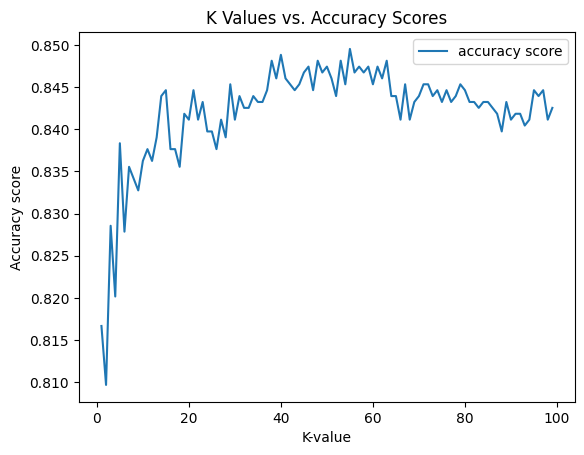

In [ ]:
#Check for the best k-values

k_vals=[]
ac_scores=[]
for k in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  k_vals.append(k)
  ac_scores.append(accuracy_score(y_test, y_pred))

k_vals=np.array(k_vals)
ac_scores=np.array(ac_scores)
accuracy_k= pd.DataFrame(k_vals,columns=['k'])
accuracy_k['accuracy score']=ac_scores
accuracy_k.plot.line(x='k',y='accuracy score', title='K Values vs. Accuracy Scores')
plt.xlabel('K-value')
plt.ylabel('Accuracy score')

[[636  61]
 [158 574]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       697
           1       0.90      0.78      0.84       732

    accuracy                           0.85      1429
   macro avg       0.85      0.85      0.85      1429
weighted avg       0.85      0.85      0.85      1429



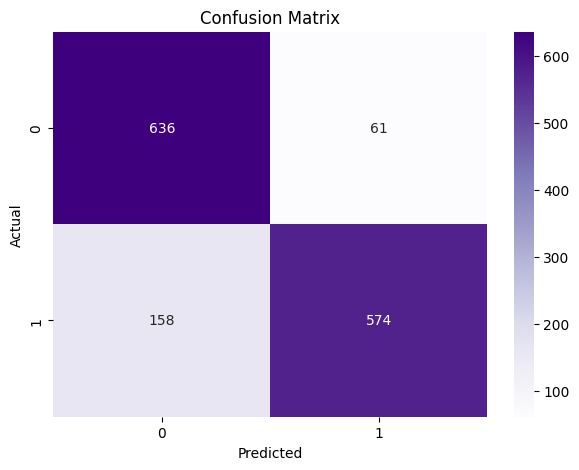

In [ ]:
#Apply KNN

knn = KNeighborsClassifier(n_neighbors=56)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

classes = diabete_data['DIABETES'].unique()

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model #2: Logistic Regression Analysis

In [ ]:
#Preprocess data for Logistic regression

##Split the data into features and label.
X_log = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM', 'Total_Cholesterol',
                 'Depression', 'HTN', 'OA', 'COPD', 'Sex']]
y_log = diabete_data['DIABETES']

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

##Normalizing data
scaler_log = StandardScaler()
X_log_scaled = scaler_log.fit_transform(X_log)

Confusion Matrix:
[[639  58]
 [102 630]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       697
           1       0.92      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



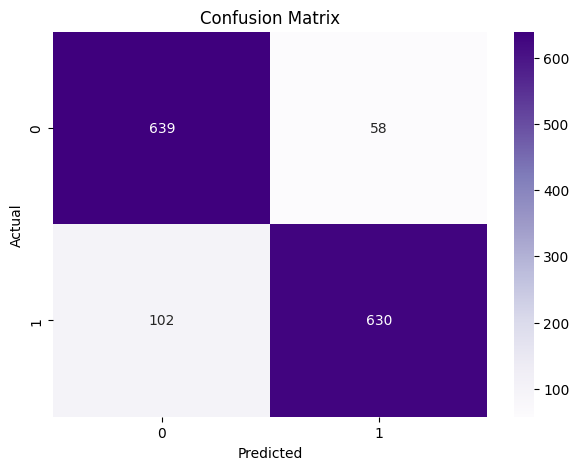

In [ ]:
#Apply logistic regression

##Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_log_train, y_log_train)

##Use the model to make predictions on the testing data
y_log_pred = log_reg.predict(X_log_test)

##Evaluate the model
conf_matrix = confusion_matrix(y_log_test, y_log_pred)
class_report = classification_report(y_log_test, y_log_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

classes = diabete_data['DIABETES'].unique()

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_log_test, y_log_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_log_train, y_log_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()


Cross-Validation Accuracy Scores [0.85664336 0.88111888 0.87937063 0.86888112 0.86713287 0.87937063
 0.87915937 0.88791594 0.86690018 0.89141856]


(0.8566433566433567, 0.8757911528051633, 0.8914185639229422)

# Model #3: Naïve Bayes Classifier Analysis

In [ ]:
#Preprocess data for Naïve Bayes Classifier

##Create list of numerical and categorical features
target_column = 'DIABETES'
categorical_columns = ['Sex', 'HTN', 'OA', 'Depression', 'FBS>DM', 'COPD']
numerical_columns = [i for i in diabete_data.columns if i not in categorical_columns + [target_column]]

##Splitting the original dataset into training, validation, and test sets
train_diabete_data = diabete_data.sample(frac = 0.8)

##Removing the training data from the original dataset to get the combined validation and test data
test_diabete_data = diabete_data.drop(train_diabete_data.index)

##Splitting the combined validation and test data into two equal parts for validation and testing, respectively
valid_diabete_data = test_diabete_data.sample(frac = 0.5)
test_diabete_data = test_diabete_data.drop(valid_diabete_data.index)

In [ ]:
# Define utility functions for model evaluation

def get_scores(Y, Y_pred):
    """
    Computes various evaluation metrics for model predictions.

    Parameters:
    - Y: Actual target values.
    - Y_pred: Predicted target values by the model.

    Returns:
    - conf_matrix: Confusion matrix showing true positives, true negatives, false positives, and false negatives.
    - class_report: Classification report detailing precision, recall, and F1-score for each class.
    - auc: Area Under the Curve (AUC) value for the model's predictions.
    - acc: Accuracy of the model's predictions.
    """
    conf_matrix = confusion_matrix(Y, Y_pred)
    class_report = classification_report(Y, Y_pred)
    auc = roc_auc_score(Y, Y_pred)
    acc = accuracy_score(Y, Y_pred)

    return conf_matrix, class_report, auc, acc

def print_scores(conf_matrix, class_report, auc, acc):
    """
    Prints the evaluation metrics in a structured format.

    Parameters:
    - conf_matrix: Confusion matrix from get_scores function.
    - class_report: Classification report from get_scores function.
    - auc: AUC value from get_scores function.
    - acc: Accuracy value from get_scores function.
    """
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(


AUC :  0.8667289763575872
Accuracy :  0.8667599720083975
Confusion Matrix:
[[3036  474]
 [ 478 3157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3510
           1       0.87      0.87      0.87      3635

    accuracy                           0.87      7145
   macro avg       0.87      0.87      0.87      7145
weighted avg       0.87      0.87      0.87      7145



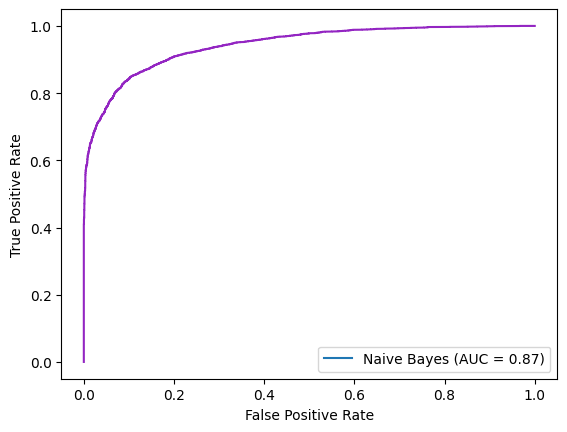

In [ ]:
#Apply data for Naïve Bayes Classifier

##Initialize the Categorical Naive Bayes model
cnb = CategoricalNB()

##Train the model on training data using all columns: categorical, numerical, and multinomial
cnb = cnb.fit(
    diabete_data[categorical_columns + numerical_columns].to_numpy(),
    diabete_data[target_column]
)

##Predict the target probabilities for the training set
y_hat_prob = cnb.predict_proba(diabete_data[categorical_columns + numerical_columns])

##Convert probabilities to class labels
y_hat = cnb.predict(diabete_data[categorical_columns + numerical_columns])

##Evaluate model's performance on the training set
conf_matrix, class_report, auc, acc = get_scores(diabete_data[target_column], y_hat)

##Print out the evaluation metrics
print_scores(conf_matrix, class_report, auc, acc)

##Visualize the Receiver Operating Characteristic (ROC) curve
fpr, tpr, thresholds = roc_curve(diabete_data[target_column], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#9325c2')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(


AUC :  0.8593279504375242
Accuracy :  0.8585434173669467
Confusion Matrix:
[[314  59]
 [ 42 299]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       373
           1       0.84      0.88      0.86       341

    accuracy                           0.86       714
   macro avg       0.86      0.86      0.86       714
weighted avg       0.86      0.86      0.86       714



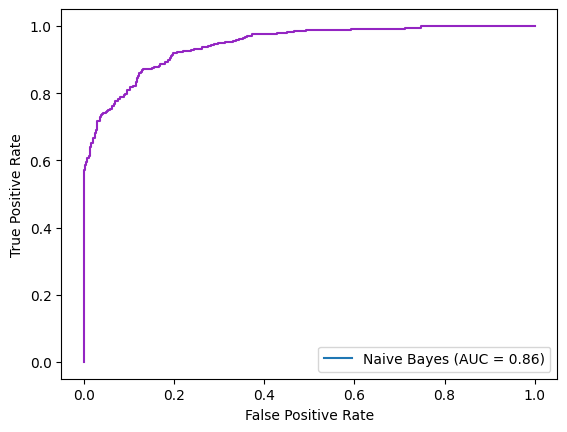

In [ ]:
##Predict the target probabilities for the validation set using the extended feature set
y_hat_prob = cnb.predict_proba(valid_diabete_data[categorical_columns + numerical_columns])

##Convert probabilities to class labels
y_hat = cnb.predict(valid_diabete_data[categorical_columns + numerical_columns])

##Evaluate model's performance on the validation set
conf_matrix, class_report, auc, acc = get_scores(valid_diabete_data[target_column], y_hat)

##Print out the evaluation metrics
print_scores(conf_matrix, class_report, auc, acc)

##Visualize the Receiver Operating Characteristic (ROC) curve for the validation set
fpr, tpr, thresholds = roc_curve(valid_diabete_data[target_column], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#9325c2')

# Model #4: Decision Tree Analysis

In [ ]:
#Preprocess data for Decision Tree

##Splitting the data into 80% training and 20% testing
train = diabete_data.sample(frac=0.8, random_state=42)
test = diabete_data.drop(train.index)

##Initializing a column transformer that will handle categorical data encoding
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [c for c in categorical_columns + numerical_columns]),
                        ('target_encoder', TargetEncoder(), [])],
                       remainder='passthrough')

##Initializing a Decision Tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')

In [ ]:
#Apply data for Decision Tree

##Creating a pipeline that first preprocesses the data and then applies the decision tree
model = Pipeline([
    ('pre_process', ct),
    ('DT', dt)
])

##Training the model on the training data
model = model.fit(train.drop('DIABETES', axis=1), train['DIABETES'])

##Predicting and evaluating the model's performance on the training data
Y_pred = model.predict(train.drop('DIABETES', axis=1))
accuracy_score(train['DIABETES'], Y_pred)

1.0

In [ ]:
##Predicting and evaluating the model's performance on the test data
Y_pred = model.predict(test.drop('DIABETES', axis=1))
accuracy_score(test['DIABETES'], Y_pred)

0.8355493351994402

#Model #5: Neural Networks

# Question 2: Study the Correlation of Different Predictors with Diabetes

#Focus on Dropping Sugar and Fat Levels

## Drop FBS and FBS>DM from Logistic Regression Model

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Confusion Matrix:
[[610  87]
 [129 603]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       697
           1       0.87      0.82      0.85       732

    accuracy                           0.85      1429
   macro avg       0.85      0.85      0.85      1429
weighted avg       0.85      0.85      0.85      1429



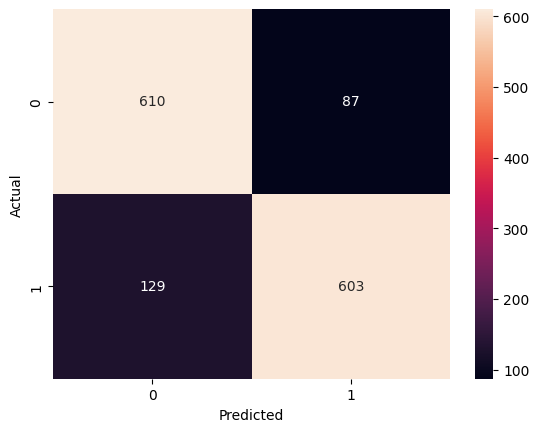

In [ ]:
#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)
#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Drop LDL and HDL from Logistic Regression Model

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Confusion Matrix:
[[636  61]
 [102 630]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       697
           1       0.91      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



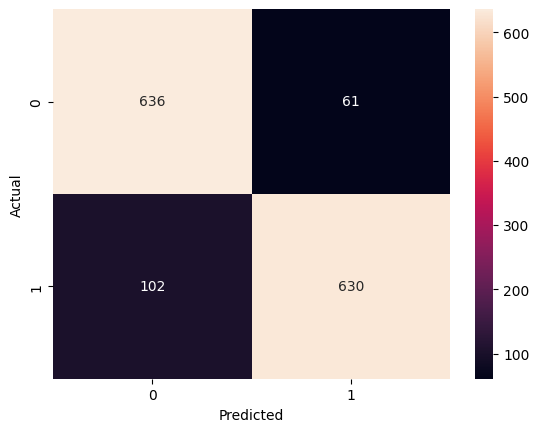

In [ ]:
#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Drop FBS, FBS>DM, LDL and HDL from Logistic Regression Model

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['sBP', 'BMI', 'A1c', 'TG',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Confusion Matrix:
[[606  91]
 [130 602]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       697
           1       0.87      0.82      0.84       732

    accuracy                           0.85      1429
   macro avg       0.85      0.85      0.85      1429
weighted avg       0.85      0.85      0.85      1429



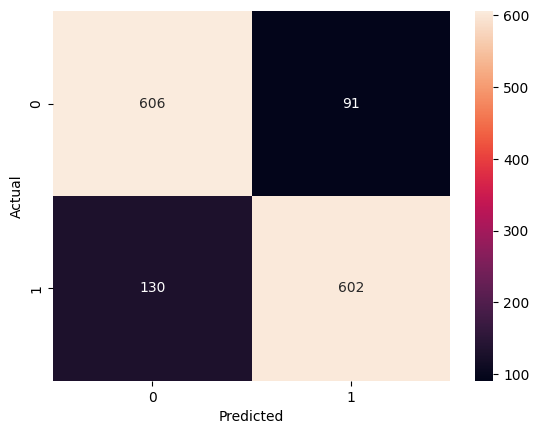

In [ ]:
#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Drop Other Predictors One at a Time

##Drop Age at Exam

Confusion Matrix:
[[642  55]
 [102 630]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       697
           1       0.92      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



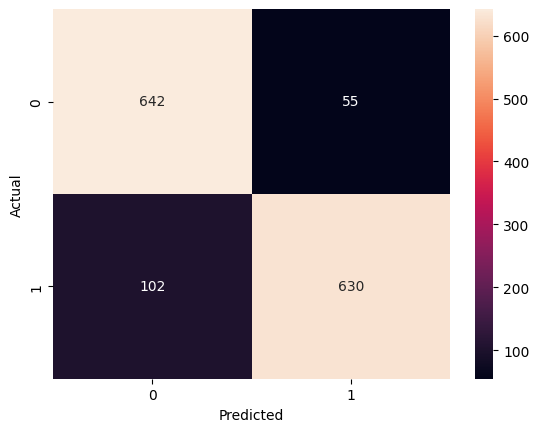

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Drop sBP

Confusion Matrix:
[[636  61]
 [102 630]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       697
           1       0.91      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



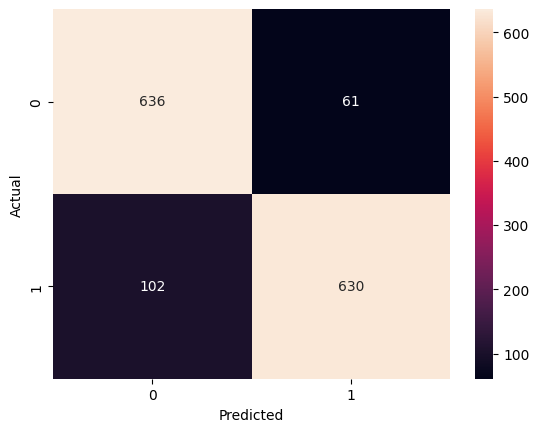

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Drop BMI

Confusion Matrix:
[[638  59]
 [103 629]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       697
           1       0.91      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



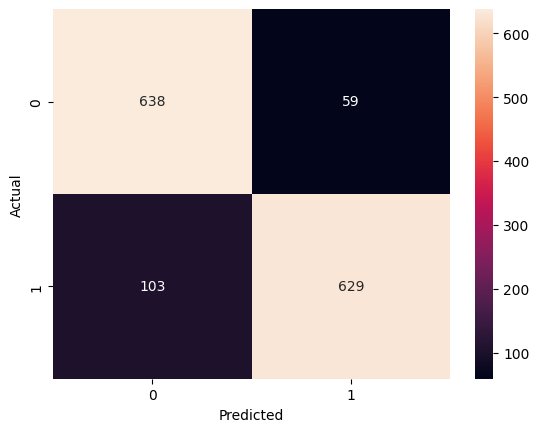

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Drop A1c

Confusion Matrix:
[[607  90]
 [118 614]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       697
           1       0.87      0.84      0.86       732

    accuracy                           0.85      1429
   macro avg       0.85      0.85      0.85      1429
weighted avg       0.86      0.85      0.85      1429



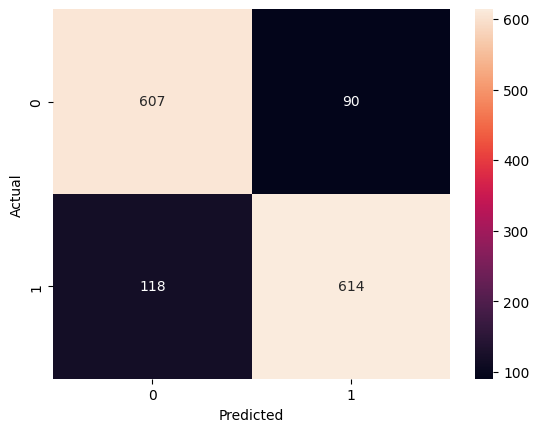

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Drop TG

Confusion Matrix:
[[638  59]
 [103 629]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       697
           1       0.91      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



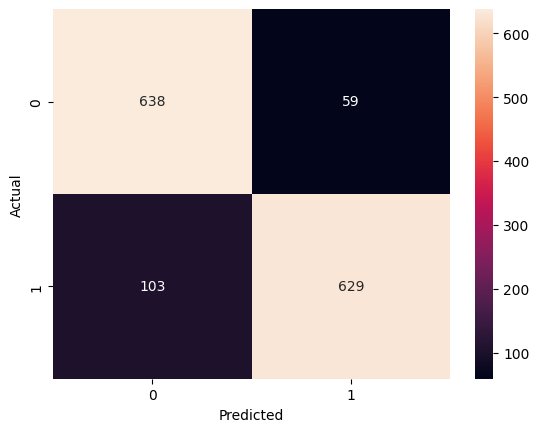

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Drop Total_Cholesterol

Confusion Matrix:
[[640  57]
 [103 629]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       697
           1       0.92      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



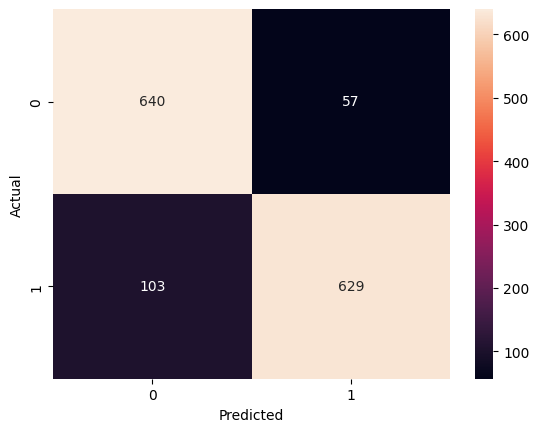

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Depression', 'HTN', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Drop Depression

Confusion Matrix:
[[639  58]
 [102 630]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       697
           1       0.92      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



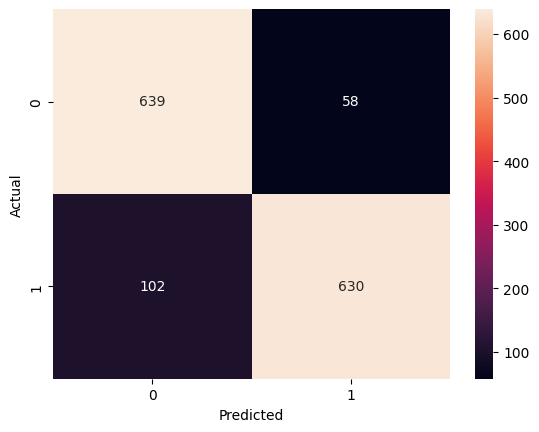

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'HTN', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Drop HTN

Confusion Matrix:
[[639  58]
 [102 630]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       697
           1       0.92      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



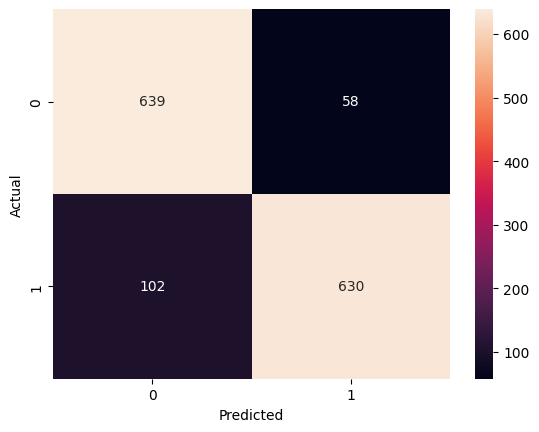

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'OA', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Drop OA

Confusion Matrix:
[[636  61]
 [102 630]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       697
           1       0.91      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



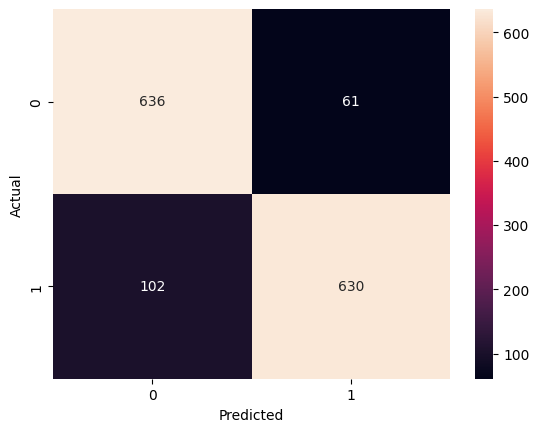

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'HTN', 'COPD',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Drop COPD

Confusion Matrix:
[[637  60]
 [102 630]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       697
           1       0.91      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



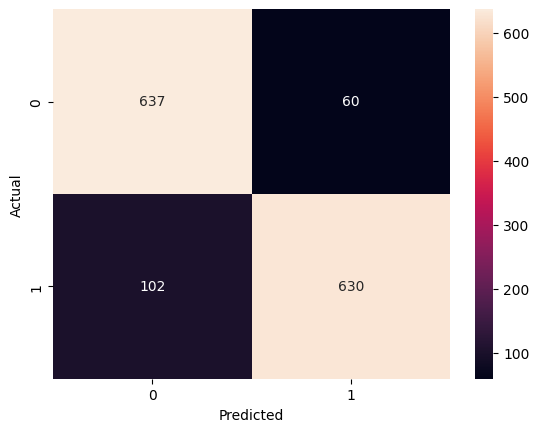

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA',
       'Sex']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Drop Sex

Confusion Matrix:
[[639  58]
 [103 629]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       697
           1       0.92      0.86      0.89       732

    accuracy                           0.89      1429
   macro avg       0.89      0.89      0.89      1429
weighted avg       0.89      0.89      0.89      1429



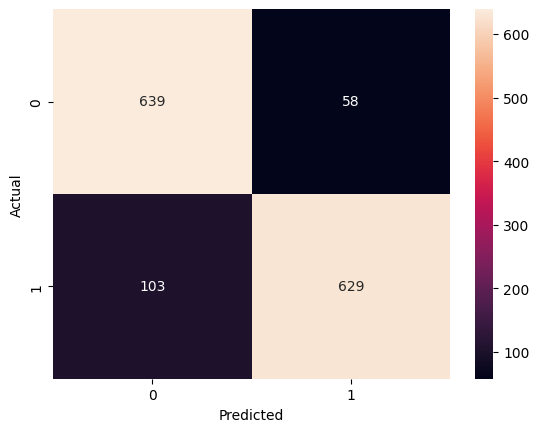

In [ ]:
#Preprocess the data
##Split the data into features and target variable
X = diabete_data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Depression', 'HTN', 'OA', 'COPD']]
y = diabete_data['DIABETES']

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

#Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

#Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###***NEW NEURAL NETWORKS

In [ ]:
# Randomly sample 70% of the data for training
train_data = diabete_data.sample(frac = 0.7, random_state=10)

# Use the remaining 30% for testing
test_data = diabete_data.drop(train_data.index)

# Check the mean of the 'DIABETES' column in both training and testing data
train_data['DIABETES'].mean()
test_data['DIABETES'].mean()

# Data Preparation

# Extract the 'DIABETES' column as the target variable for training and testing
Y_train = train_data['DIABETES'].to_numpy()
Y_test = test_data['DIABETES'].to_numpy()

# Extract the features (excluding 'DIABETES') for training and testing
X_train = train_data.drop('DIABETES', axis=1).to_numpy()
X_test = test_data.drop('DIABETES', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 32
hidden_units_layer_2 = 32

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((15, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 2000
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Text(0, 0.5, 'loss')

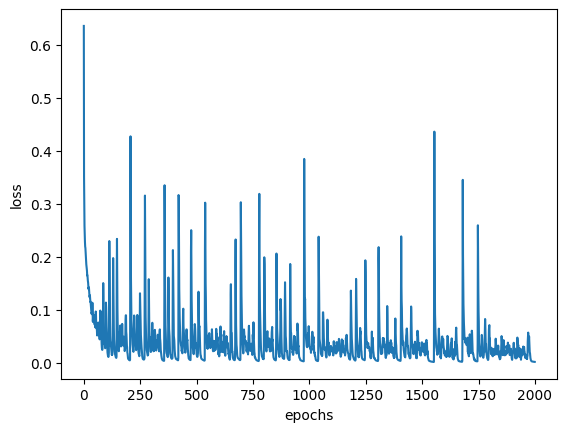

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

2.392920970916748
0.0018903325544670224


In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Regularization
# Deep neural networks are prone to overfitting if there is not much data available during training.

# Define hyperparameters
number_of_input_features = 15
number_of_hidden_units = 32
epochs = 100
learning_rate = 0.01
batch_size = 32
landa = 0.01  # Regularization term (lambda)

# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/100 ---> Train Accuracy: 0.8776489496231079, Validation Accuracy: 0.8730751276016235
Epoch 1/100 ---> Train Accuracy: 0.8786485195159912, Validation Accuracy: 0.8772748708724976
Epoch 2/100 ---> Train Accuracy: 0.8784486055374146, Validation Accuracy: 0.8707419633865356
Epoch 3/100 ---> Train Accuracy: 0.8730508089065552, Validation Accuracy: 0.8688753843307495
Epoch 4/100 ---> Train Accuracy: 0.8724510073661804, Validation Accuracy: 0.872608482837677
Epoch 5/100 ---> Train Accuracy: 0.8668532371520996, Validation Accuracy: 0.8656089305877686
Epoch 6/100 ---> Train Accuracy: 0.871051549911499, Validation Accuracy: 0.8707419633865356
Epoch 7/100 ---> Train Accuracy: 0.8780487775802612, Validation Accuracy: 0.8744750618934631
Epoch 8/100 ---> Train Accuracy: 0.8728508353233337, Validation Accuracy: 0.8712086081504822
Epoch 9/100 ---> Train Accuracy: 0.8764494061470032, Validation Accuracy: 0.872608482837677
Epoch 10/100 ---> Train Accuracy: 0.8698520660400391, Validation Accuracy

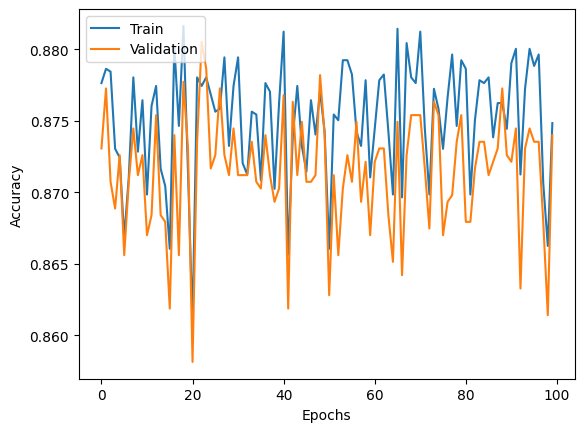

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()